In [1]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
import deepquantum as dq
import numpy as np
import torch

# quantum u gate map

 Use `UnitaryMapper` for mapping the quantum gate to photonic quantum circuit. \
 nmode: 2*n_qubits + 2 \
 auxiliary modes: [0,0] or [1,0] in the last 2modes \
succcess probability: preferred 1/3 for 2qubtis, 1/4 for 3 qubits 

## map the quantum gate

In [2]:
swap = np.array([[1,0,0,0],
                 [0,0,1,0],
                 [0,1,0,0],
                 [0,0,0,1]])
iswap = np.array([[1,0,0,0],
                  [0,0,1j,0],
                  [0,1j,0,0],
                  [0,0,0,1]])
cnot = np.array([[1,0,0,0],
                 [0,1,0,0],
                 [0,0,0,1],
                 [0,0,1,0]])

In [4]:
nqubit = 2
nmode = 6
ugate = cnot
aux = [0,0]
aux_pos = [4,5]
success = 1/3
umap = dq.UnitaryMapper(nqubit=nqubit, nmode=nmode, ugate=ugate, success=success, aux=aux, aux_pos=aux_pos)

In [5]:
umap.ugate = cnot
umap.success = 1/3
Re3 = umap.solve_eqs_real(total_trials=1, trials=10, precision=1e-5) # for real solution

True 1.4779295427508198e-09
True 0.27469634688360817ss: 1
True 1.0282778437182488e-09 1
True 0.34516264087306975ss: 2
True 0.27469475287120915ss: 2
True 5.633155833828364e-10: 2
True 0.3452010600217431ess: 3
True 0.2747230767059939ess: 3
True 0.34513798278447816ss: 3
True 0.3451335740606493ess: 3


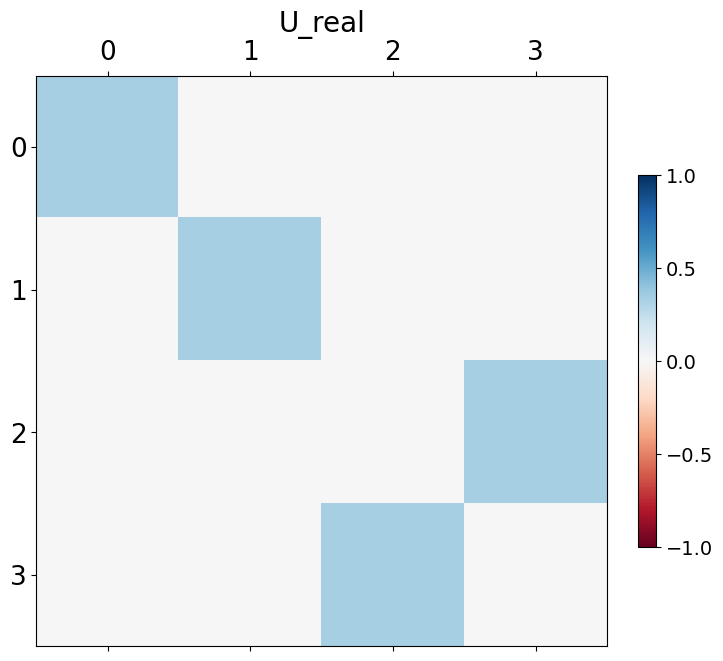

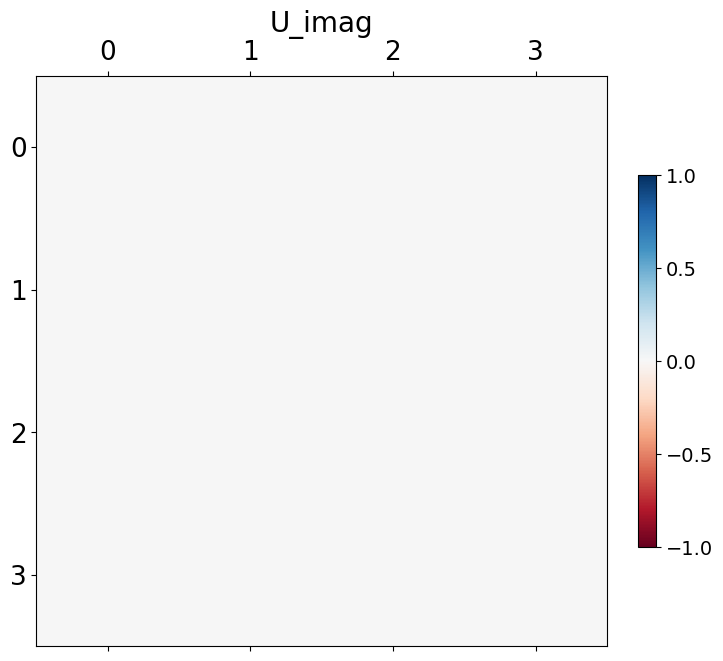

In [6]:
## check result
result = (Re3[0][0][0])
transfer_mat = umap.get_transfer_mat(result)
umap.plot_u(transfer_mat, vmin=-1)
# np.save("cnot_test.npy", re) # save the first result

## check results

In [7]:
cnot_test = result
init_state = [1,0,1,0,0,0]
test_circuit = dq.QumodeCircuit(nmode=6, init_state=init_state, basis=True)
test_circuit.any(cnot_test, list(range(6)))
test_circuit.draw()

In [8]:
re = test_circuit(state=[1,0,0,1,0,0])

In [9]:
re

{|000110>: tensor([-0.4325+0.j]),
 |010010>: tensor([0.4325+0.j]),
 |100100>: tensor([0.3333+0.j]),
 |110000>: tensor([-0.3333+0.j]),
 |000011>: tensor([-0.3222+0.j]),
 |100001>: tensor([0.3058+0.j]),
 |000002>: tensor([-0.2433+0.j]),
 |000020>: tensor([0.2433+0.j]),
 |000101>: tensor([-0.1875+0.j]),
 |010001>: tensor([0.1875+0.j]),
 |100010>: tensor([-0.1326+0.j]),
 |020000>: tensor([3.7649e-12+0.j]),
 |000200>: tensor([-2.8237e-12+0.j]),
 |001100>: tensor([-1.9966e-12+0.j]),
 |011000>: tensor([1.9966e-12+0.j]),
 |001001>: tensor([-1.8319e-12+0.j]),
 |200000>: tensor([9.4123e-13+0.j]),
 |001010>: tensor([7.9422e-13+0.j]),
 |010100>: tensor([-6.6555e-13+0.j]),
 |101000>: tensor([-3.5454e-22+0.j]),
 |002000>: tensor([2.9695e-33+0.j])}

# decompose clements

 decomposing the optical qunatum circuit(unitary matrix) to clements structure

## 6x6 case

In [11]:
u6x6 = np.array([[1, 0, 1, -1, 0, 0],
                 [0, 1, 0 ,0,  0, np.sqrt(2)],
                 [1,  0, 0, 1, 1, 0],
                 [-1, 0, 1, 0, 1, 0],
                 [0,  0, 1, 1, -1,0],
                 [0, np.sqrt(2), 0,0,0,-1]])/np.sqrt(3)

In [25]:
ud = dq.UnitaryDecomposer(u6x6)
mzi_info = ud.decomp()
mzi_info[1]

defaultdict(list,
            {(0, 1): [[3.141592653589793, 3.141592653589793],
              [0.7853981633974482, 1.2309594173407747],
              [6.097165627176525, 3.141592653589793]],
             (2, 3): [[3.141592653589793, 1.5707963267948966],
              [3.6193207356284853, 0.3627244299626541],
              [3.9526537786734766, 0.44548820174171067]],
             (1, 2): [[6.079218000513128, 4.3156358116060117e-48],
              [4.258303107794118, 1.5194704034224278],
              [2.6046015527494344, 0.45697074218573075]],
             (4, 5): [[0.49166900912370315, 2.506136133446219],
              [4.1208999449406685, 0.362724429962654],
              [1.4709763004745784, 1.919244586547647e-32]],
             (3, 4): [[4.100931566039158, 1.1829780708880424],
              [0.9793072913508754, 1.1829780708880426],
              [0.7565631904800192, 3.141592653589793]],
             (5, 6): []})

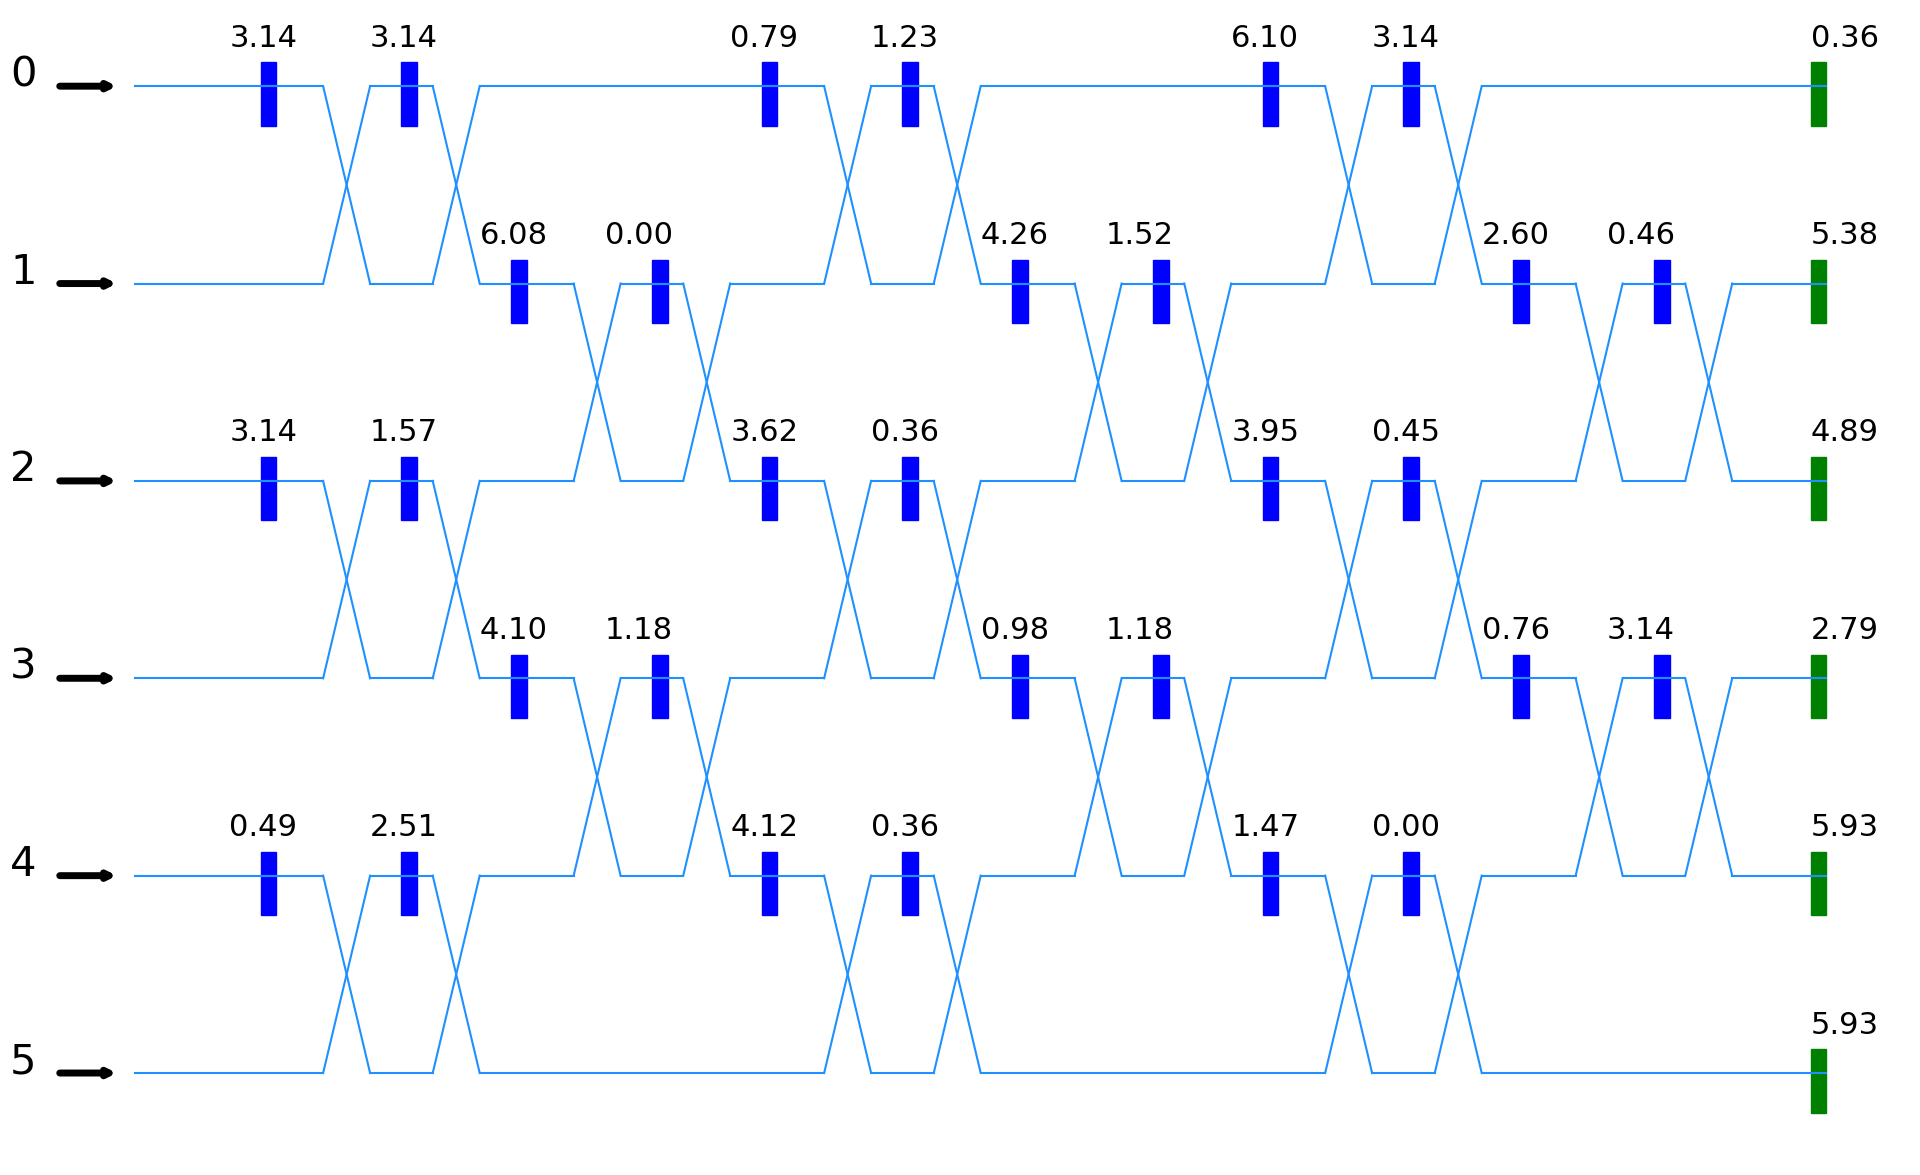

In [13]:
p_mzi = dq.DrawClements(6,mzi_info[0])
p_mzi.plotting_clements()

## 8x8 case

In [15]:
u8x8 = np.eye(8,8)
ud = dq.UnitaryDecomposer(u8x8)
mzi_info = ud.decomp()

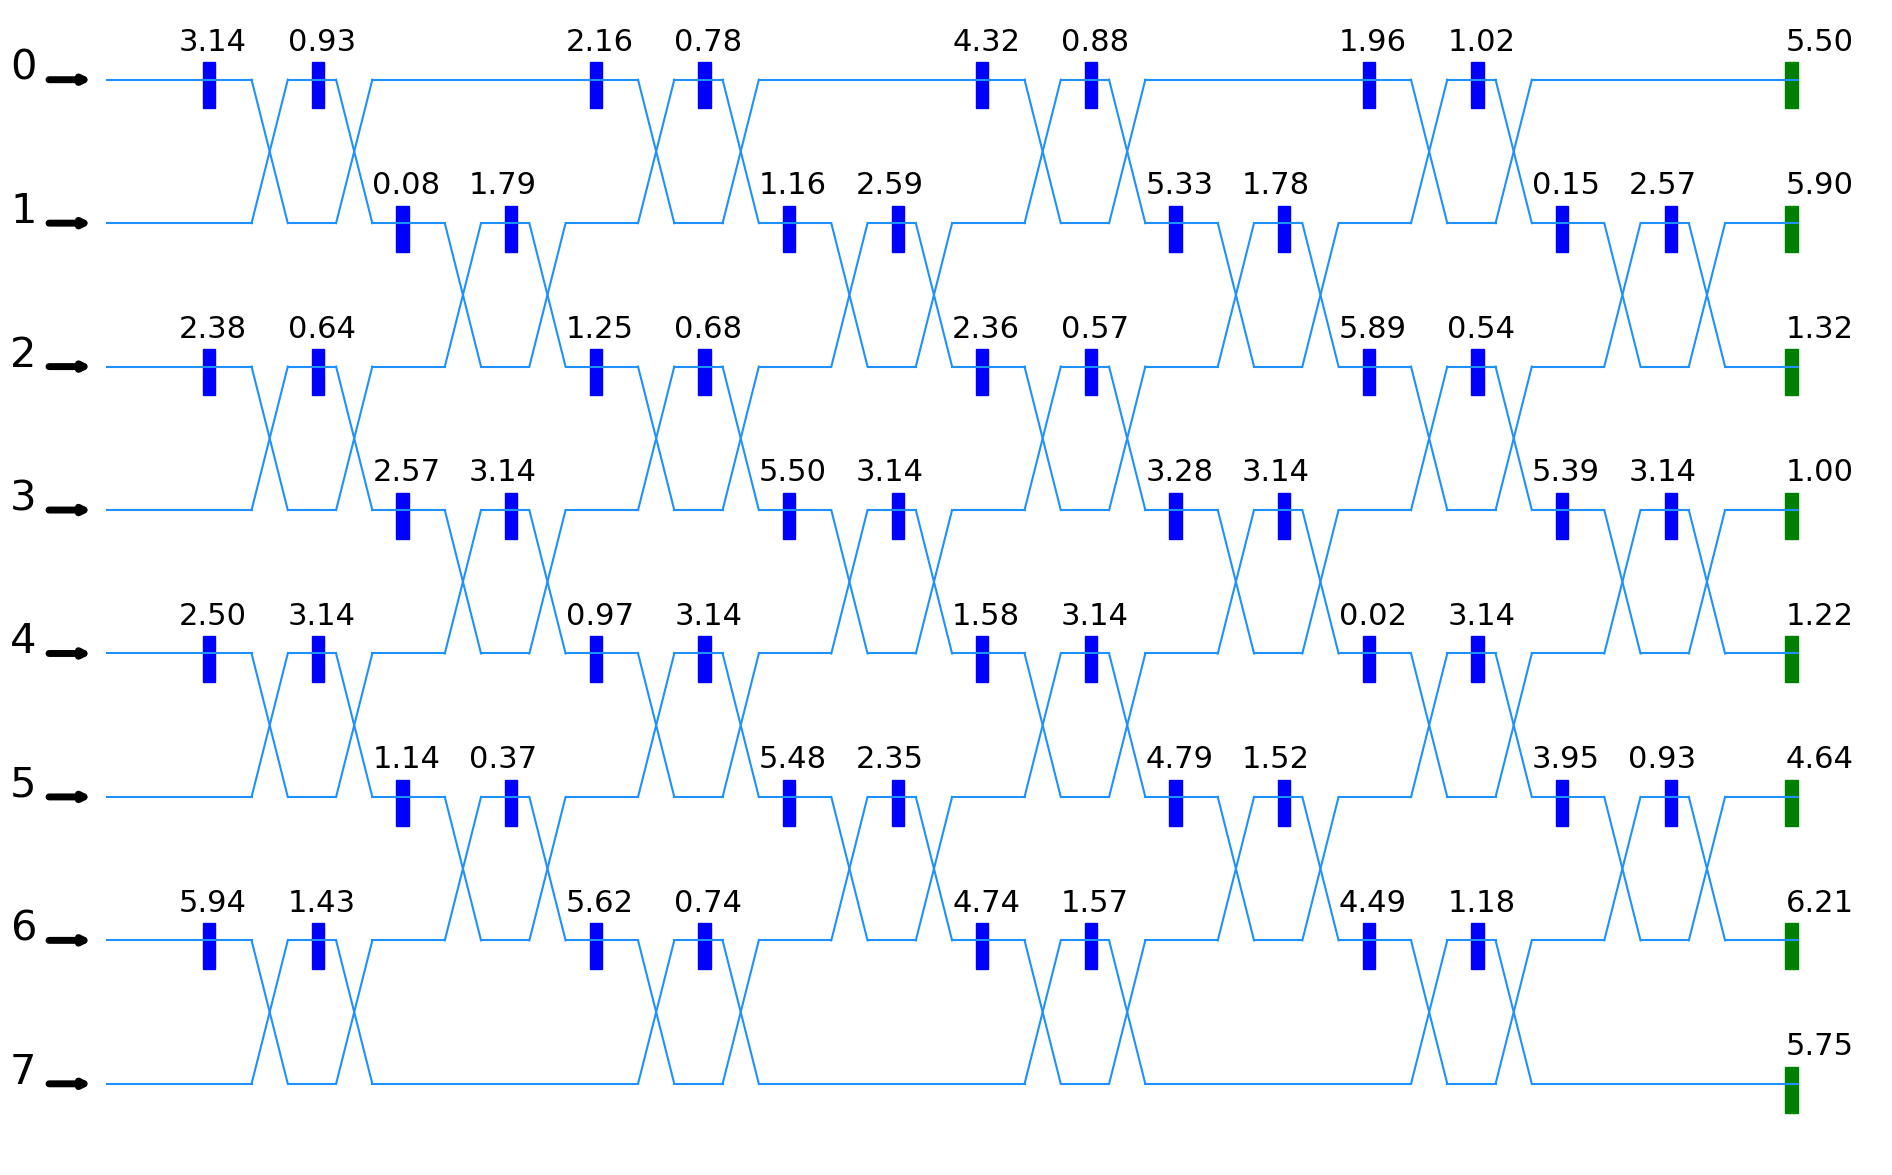

In [16]:
p_mzi = dq.DrawClements(8,mzi_info[0])
p_mzi.plotting_clements()

In [17]:
p_mzi.ps_position

{(0, 0): 3.1416,
 (0, 1): 0.9273,
 (0, 2): 2.1616,
 (0, 3): 0.7752,
 (0, 4): 4.3217,
 (0, 5): 0.8798,
 (0, 6): 1.9594,
 (0, 7): 1.0247,
 (0, 8): 5.4951,
 (1, 0): 0.0752,
 (1, 1): 1.7908,
 (1, 2): 1.1645,
 (1, 3): 2.5852,
 (1, 4): 5.3348,
 (1, 5): 1.7785,
 (1, 6): 0.1508,
 (1, 7): 2.5681,
 (1, 8): 5.9047,
 (2, 0): 2.3782,
 (2, 1): 0.6377,
 (2, 2): 1.2455,
 (2, 3): 0.6841,
 (2, 4): 2.3566,
 (2, 5): 0.5719,
 (2, 6): 5.8933,
 (2, 7): 0.5361,
 (2, 8): 1.3179,
 (3, 0): 2.5703,
 (3, 1): 3.1416,
 (3, 2): 5.5034,
 (3, 3): 3.1416,
 (3, 4): 3.2802,
 (3, 5): 3.1416,
 (3, 6): 5.3868,
 (3, 7): 3.1416,
 (3, 8): 0.997,
 (4, 0): 2.4963,
 (4, 1): 3.1416,
 (4, 2): 0.9728,
 (4, 3): 3.1416,
 (4, 4): 1.5785,
 (4, 5): 3.1416,
 (4, 6): 0.0168,
 (4, 7): 3.1416,
 (4, 8): 1.2189,
 (5, 0): 1.1413,
 (5, 1): 0.3674,
 (5, 2): 5.4773,
 (5, 3): 2.3519,
 (5, 4): 4.7874,
 (5, 5): 1.5155,
 (5, 6): 3.9526,
 (5, 7): 0.9273,
 (5, 8): 4.6401,
 (6, 0): 5.9447,
 (6, 1): 1.4337,
 (6, 2): 5.616,
 (6, 3): 0.736,
 (6, 4): 4.7445,


## Clements in ansatz

In [33]:
clements = dq.Clements(nmode=6, init_state=[1,0,1,0,0,0], cutoff=3)

In [41]:
clements.draw()

In [47]:
data = clements.dict2data(mzi_info[2]) # encoding the 6x6 data
re = clements(data=data)
re

{|200000>: tensor([[0.4714+2.8422e-05j]]),
 |000200>: tensor([[-0.4714-0.0001j]]),
 |001100>: tensor([[0.3333+8.1145e-05j]]),
 |100010>: tensor([[0.3333+9.5837e-06j]]),
 |001010>: tensor([[0.3333+3.1935e-05j]]),
 |000110>: tensor([[-0.3333-4.8247e-05j]]),
 |101000>: tensor([[0.3333+3.2762e-05j]]),
 |100100>: tensor([[2.7984e-05-9.6507e-06j]]),
 |002000>: tensor([[-1.0986e-05-1.3698e-05j]]),
 |110000>: tensor([[9.8662e-06+5.6045e-06j]]),
 |011000>: tensor([[4.5295e-06+6.4178e-06j]]),
 |010100>: tensor([[8.0697e-07-7.2308e-06j]]),
 |010010>: tensor([[5.3360e-06-8.1349e-07j]]),
 |100001>: tensor([[-1.8257e-06+2.2112e-07j]]),
 |000011>: tensor([[-1.7065e-06-4.4281e-12j]]),
 |000020>: tensor([[-1.7064e-06-2.5943e-10j]]),
 |000101>: tensor([[-1.5872e-06-2.2136e-07j]]),
 |001001>: tensor([[-1.1923e-07+2.2122e-07j]]),
 |020000>: tensor([[1.2471e-10+1.2965e-10j]]),
 |010001>: tensor([[-2.4562e-11-2.9022e-11j]]),
 |000002>: tensor([[8.6335e-13-1.6013e-12j]])}

In [48]:
clements.draw()  # 6x6 CNOT Clements structure parameters